## import할 모듈

In [1]:
#-*- coding: utf-8 -*-
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score,confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import numpy
import os
import pandas as pd
import tensorflow as tf
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import time

warnings.filterwarnings('ignore')
%matplotlib inline

## CSV 파일 읽어오기, seed 값 설정

In [2]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)
df = pd.read_csv("creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
print('데이터 세트 Null 값 갯수 \n',df.isnull().sum())

데이터 세트 Null 값 갯수 
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
#CSV 데이터 종속, 독립 변수 분할
dataset = df.values
X = dataset[:,1:30]

Y = dataset[:,30]       #종속변수
#훈련, 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=3)

In [6]:
#모델 구조 생성
model = Sequential()
model.add(Dense(30,  input_dim=29, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
#모델 컴파일 및 학습
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])
MODEL_DIR = './credit_model/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only=True)

early_stopping_callback= EarlyStopping(monitor= 'val_loss', patience = 20)

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=100, callbacks = [early_stopping_callback,checkpointer])

Epoch 1/100
1937/1937 [==============================] - 5s 2ms/step - loss: 0.0652 - accuracy: 0.9895 - val_loss: 0.0253 - val_accuracy: 0.9987

Epoch 00001: val_loss improved from inf to 0.02526, saving model to ./model\01-0.0253.hdf5
Epoch 2/100
1937/1937 [==============================] - 3s 1ms/step - loss: 0.0084 - accuracy: 0.9994 - val_loss: 0.0078 - val_accuracy: 0.9993

Epoch 00002: val_loss improved from 0.02526 to 0.00775, saving model to ./model\02-0.0078.hdf5
Epoch 3/100
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0079 - accuracy: 0.9993 - val_loss: 0.0077 - val_accuracy: 0.9993

Epoch 00003: val_loss improved from 0.00775 to 0.00769, saving model to ./model\03-0.0077.hdf5
Epoch 4/100
1937/1937 [==============================] - 3s 1ms/step - loss: 0.0049 - accuracy: 0.9994 - val_loss: 0.0065 - val_accuracy: 0.9992

Epoch 00004: val_loss improved from 0.00769 to 0.00651, saving model to ./model\04-0.0065.hdf5
Epoch 5/100
1937/1937 [=================

1937/1937 [==============================] - 3s 2ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0056 - val_accuracy: 0.9994

Epoch 00040: val_loss did not improve from 0.00375
Epoch 41/100
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0045 - val_accuracy: 0.9995

Epoch 00041: val_loss did not improve from 0.00375
Epoch 42/100
1937/1937 [==============================] - 4s 2ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0045 - val_accuracy: 0.9995

Epoch 00042: val_loss did not improve from 0.00375
Epoch 43/100
1937/1937 [==============================] - 5s 2ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0051 - val_accuracy: 0.9992

Epoch 00043: val_loss did not improve from 0.00375
Epoch 44/100
1937/1937 [==============================] - 4s 2ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0049 - val_accuracy: 0.9994

Epoch 00044: val_loss did not improve from 0.00375
Epoch 45/100
1937/1937 

In [8]:
print(model.evaluate(X_test, Y_test))

1336/1336 [==============================] - 1s 976us/step - loss: 0.0046 - accuracy: 0.9995
[0.004616077058017254, 0.9995318651199341]


In [9]:
predict = model.predict(X)

In [10]:
for i in range(10):
    print('%.10f' % predict[i], Y[i])

0.0010518730 0.0
0.0000003798 0.0
0.0012213588 0.0
0.0000000482 0.0
0.0000290635 0.0
0.0000014384 0.0
0.0000010678 0.0
0.0000000913 0.0
0.0000000067 0.0
0.0000004149 0.0


In [11]:
r_count = 0
w_count = 0
pred_r = 0
pred_w = 0
tp = 0
fp = 0
tn = 0
fn = 0
for index, i in enumerate(Y):
    if i == 1.0:
        if (predict[index] > 0.5):
            tp += 1
        else :
            fn += 1
    else:
        if (predict[index] > 0.5):
            fp += 1
        else :
            tn += 1
print(tp, fp, tn, fn)

418 18 284297 74


In [12]:
print("precision =\t", tp / (tp + fp))
print("recall =\t", tp / (tp + fn))

precision =	 0.9587155963302753
recall =	 0.8495934959349594


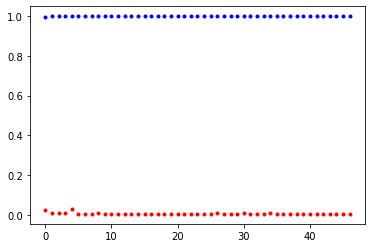

In [13]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = numpy.arange(len(y_vloss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3)
plt.show()

In [14]:
scaler= MinMaxScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [15]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.000030,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.000965,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.002642,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0.000389,0


In [16]:
#CSV 데이터 종속, 독립 변수 분할
dataset = df.values
X = dataset[:,1:30]

Y = dataset[:,30]       #종속변수
#훈련, 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=3)

In [17]:
#모델 컴파일 및 학습
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])
MODEL_DIR = './credit_model/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only=True)

early_stopping_callback= EarlyStopping(monitor= 'val_loss', patience = 20)

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=100, callbacks = [early_stopping_callback,checkpointer])

Epoch 1/100
1937/1937 [==============================] - 4s 2ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.0038 - val_accuracy: 0.9994

Epoch 00001: val_loss improved from inf to 0.00383, saving model to ./model\01-0.0038.hdf5
Epoch 2/100
1937/1937 [==============================] - 3s 1ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0037 - val_accuracy: 0.9994

Epoch 00002: val_loss improved from 0.00383 to 0.00366, saving model to ./model\02-0.0037.hdf5
Epoch 3/100
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0039 - val_accuracy: 0.9994

Epoch 00003: val_loss did not improve from 0.00366
Epoch 4/100
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0044 - val_accuracy: 0.9993

Epoch 00004: val_loss did not improve from 0.00366
Epoch 5/100
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0040 - val_

In [18]:
print(model.evaluate(X_test, Y_test))

1336/1336 [==============================] - 1s 977us/step - loss: 0.0064 - accuracy: 0.9995
[0.006423380225896835, 0.9994850158691406]


In [19]:
predict = model.predict(X)

In [20]:
for i in range(10):
    print('%.10f' % predict[i], Y[i])

0.0000007490 0.0
0.0000000004 0.0
0.0000000004 0.0
0.0000008722 0.0
0.0000003019 0.0
0.0000178093 0.0
0.0006220043 0.0
0.0000000143 0.0
0.0000000053 0.0
0.0000127291 0.0


In [21]:
r_count = 0
w_count = 0
pred_r = 0
pred_w = 0
tp = 0
fp = 0
tn = 0
fn = 0
for index, i in enumerate(Y):
    if i == 1.0:
        if (predict[index] > 0.5):
            tp += 1
        else :
            fn += 1
    else:
        if (predict[index] > 0.5):
            fp += 1
        else :
            tn += 1
print(tp, fp, tn, fn)

426 27 284288 66


In [22]:
print("precision =\t", tp / (tp + fp))
print("recall =\t", tp / (tp + fn))

precision =	 0.9403973509933775
recall =	 0.8658536585365854


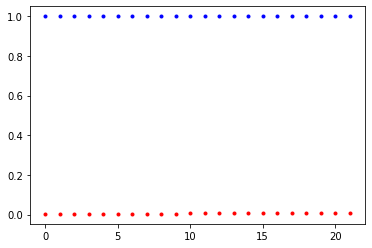

In [23]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = numpy.arange(len(y_vloss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3)
plt.show()

In [24]:
df = df.sample(frac = 1)

In [25]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0.001557,0
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0.000077,0
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0.003737,0
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0.011989,0
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0.000195,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,138459.0,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,...,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,0.001942,0
86293,61167.0,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,...,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,0.000973,0
122579,76616.0,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,...,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,0.001358,0
152315,97253.0,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,...,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,0.006668,0


In [26]:
#CSV 데이터 종속, 독립 변수 분할
dataset = df.values
X = dataset[:,1:30]

Y = dataset[:,30]       #종속변수
#훈련, 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=3)

In [27]:
#모델 컴파일 및 학습
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])
MODEL_DIR = './credit_model/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only=True)

early_stopping_callback= EarlyStopping(monitor= 'val_loss', patience = 20)

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=100, callbacks = [early_stopping_callback,checkpointer])

Epoch 1/100
1937/1937 [==============================] - 4s 2ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.0049 - val_accuracy: 0.9995

Epoch 00001: val_loss improved from inf to 0.00487, saving model to ./model\01-0.0049.hdf5
Epoch 2/100
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0047 - val_accuracy: 0.9994

Epoch 00002: val_loss improved from 0.00487 to 0.00466, saving model to ./model\02-0.0047.hdf5
Epoch 3/100
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0051 - val_accuracy: 0.9994

Epoch 00003: val_loss did not improve from 0.00466
Epoch 4/100
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0051 - val_accuracy: 0.9995

Epoch 00004: val_loss did not improve from 0.00466
Epoch 5/100
1937/1937 [==============================] - 3s 2ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0056 - val_

In [28]:
print(model.evaluate(X_test, Y_test))

1336/1336 [==============================] - 1s 981us/step - loss: 0.0024 - accuracy: 0.9997
[0.002360748825594783, 0.9996957182884216]


In [29]:
predict = model.predict(X)

In [30]:
for i in range(10):
    print('%.10f' % predict[i], Y[i])

0.0000006503 0.0
0.0000000655 0.0
0.0000000000 0.0
0.0000003681 0.0
0.0000004238 0.0
0.0000387568 0.0
0.0000000001 0.0
0.0000021070 0.0
0.0000000013 0.0
0.0000630336 0.0


In [31]:
r_count = 0
w_count = 0
pred_r = 0
pred_w = 0
tp = 0
fp = 0
tn = 0
fn = 0
for index, i in enumerate(Y):
    if i == 1.0:
        if (predict[index] > 0.5):
            tp += 1
        else :
            fn += 1
    else:
        if (predict[index] > 0.5):
            fp += 1
        else :
            tn += 1
print(tp, fp, tn, fn)

425 19 284296 67


In [32]:
print("precision =\t", tp / (tp + fp))
print("recall =\t", tp / (tp + fn))

precision =	 0.9572072072072072
recall =	 0.8638211382113821


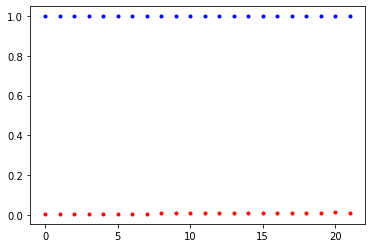

In [33]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = numpy.arange(len(y_vloss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3)
plt.show()